<a href="https://colab.research.google.com/github/Shreygupta2002/UG-Project-Predicting-Disasterous-Tweets/blob/main/UG_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing required libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, BatchNormalization, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

### Analysing Training Dataset (Exploratory Data Analysis)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UG Project/train.csv')

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


<Axes: xlabel='target', ylabel='count'>

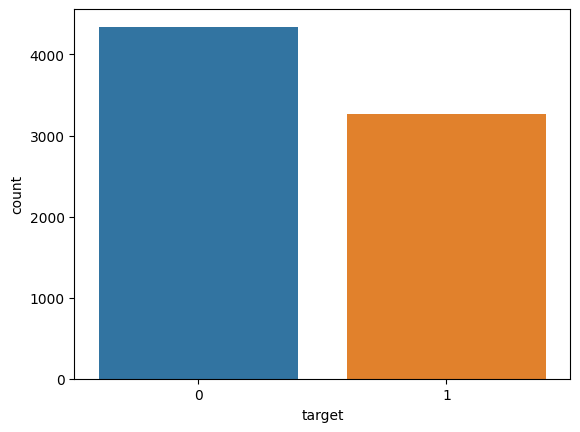

In [ ]:
sns.countplot(x='target',data=df)

In [ ]:
disaster = []
non_disaster = []
for ind in df.index:
  if df['target'][ind]==1:
    disaster.append(df['text'][ind])
  else:
    non_disaster.append(df['text'][ind])

In [ ]:
# Printing 5 disaster tweets
print("Some of the Disaster Tweets are - ")
for i in range(5):
  print(disaster[i])

Some of the Disaster Tweets are - 
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Forest fire near La Ronge Sask. Canada
All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [ ]:
# Printing 5 non - disaster tweets
print("Some of the Non - Disaster Tweets are - ")
for i in range(5):
  print(non_disaster[i])

Some of the Non - Disaster Tweets are - 
What's up man?
I love fruits
Summer is lovely
My car is so fast
What a goooooooaaaaaal!!!!!!


In [ ]:
a=[]
size=-1
for text in df['text']:
    temp = text.split()
    # print(temp)
    size=max(size,len(temp))
    for word in temp:
        if word not in a:
            a.append(word)

In [ ]:
# Number of unique words in the dataset
print(len(a))

31924


In [ ]:
# Maximum length of the text
print(size)

31


### Creating Training set and Validation set

In [ ]:
training_sentences=[]
for text in df['text']:
    training_sentences.append(text)

In [ ]:
# Some important initialzations
vocab_size = 31925      # Number of unique words + 1
max_len = 31            # Max length of the sentences
oov_token = "<OOV>"     # Represents the Unknown words
embedding_dim = 30

In [ ]:
# Creating a tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)

In [ ]:
print("Original Sentence - ", df['text'][0])
print("The tokenized sequence - ", padded_sequences[0])

Original Sentence -  Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
The tokenized sequence -  [ 120 4634   25    5  869    9   22  264  139 1620 4635   90   41    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
print("Original Sentence - ", df['text'][1])
print("The tokenized sequence - ", padded_sequences[1])

Original Sentence -  Forest fire near La Ronge Sask. Canada
The tokenized sequence -  [ 190   46  230  800 6955 6956 1405    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
#Splitting the training and validation sets
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid= train_test_split(padded_sequences,df.target,test_size=0.1,random_state=555)

### Creating the Model for training

In [ ]:
def get_model():
    inputs = keras.Input(shape=(31,))

    x=Embedding(vocab_size,embedding_dim)(inputs)

    x=Bidirectional(LSTM(64))(x)
    x=Dropout(0.6)(x)

    x=Dense(32)(x)
    x=BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=Dropout(0.6)(x)

    x=Dense(10)(x)
    x=BatchNormalization()(x)
    x=keras.activations.relu(x)
    x=Dropout(0.6)(x)

    outputs=Dense(1,activation='sigmoid')(x)

    model=keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
model=get_model()

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 31)]              0         
                                                                 
 embedding (Embedding)       (None, 31, 30)            957750    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              48640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                               

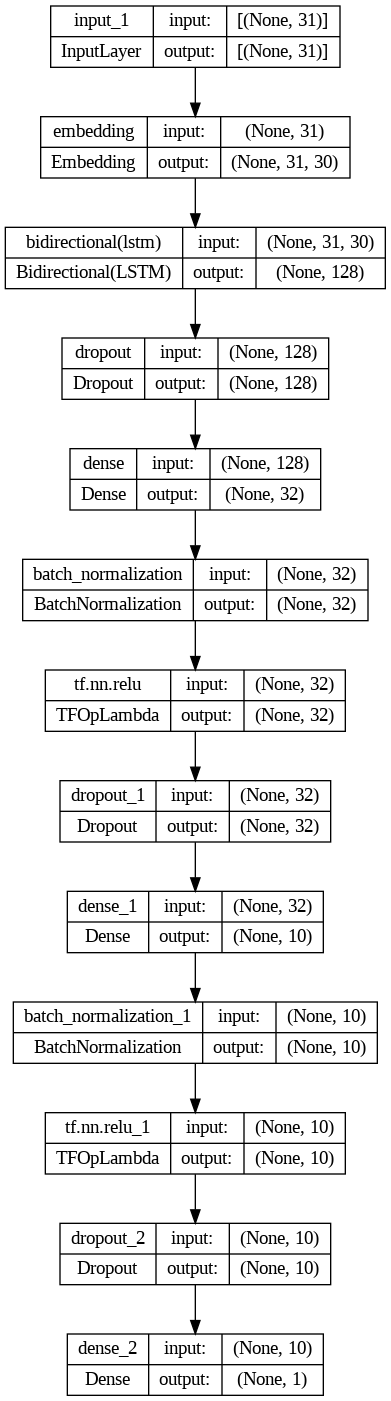

In [ ]:
tf.keras.utils.plot_model(model, to_file='/content/model.png', show_shapes=True)

In [ ]:
epochs = 10
history = model.fit(X_train, y_train, epochs=epochs, batch_size=128, verbose=1)

Epoch 1/10
54/54 [==============================] - 23s 192ms/step - loss: 0.7863 - accuracy: 0.5373
Epoch 2/10
54/54 [==============================] - 15s 274ms/step - loss: 0.7023 - accuracy: 0.5728
Epoch 3/10
54/54 [==============================] - 5s 88ms/step - loss: 0.6094 - accuracy: 0.6846
Epoch 4/10
54/54 [==============================] - 6s 102ms/step - loss: 0.5384 - accuracy: 0.7719
Epoch 5/10
54/54 [==============================] - 3s 61ms/step - loss: 0.4524 - accuracy: 0.8354
Epoch 6/10
54/54 [==============================] - 3s 49ms/step - loss: 0.3668 - accuracy: 0.8895
Epoch 7/10
54/54 [==============================] - 2s 45ms/step - loss: 0.2990 - accuracy: 0.9177
Epoch 8/10
54/54 [==============================] - 2s 33ms/step - loss: 0.2361 - accuracy: 0.9393
Epoch 9/10
54/54 [==============================] - 2s 40ms/step - loss: 0.2035 - accuracy: 0.9426
Epoch 10/10
54/54 [==============================] - 2s 36ms/step - loss: 0.1857 - accuracy: 0.9498


### Result Analysis

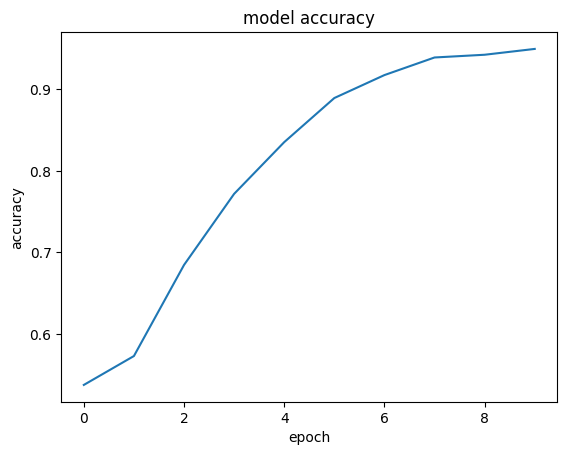

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

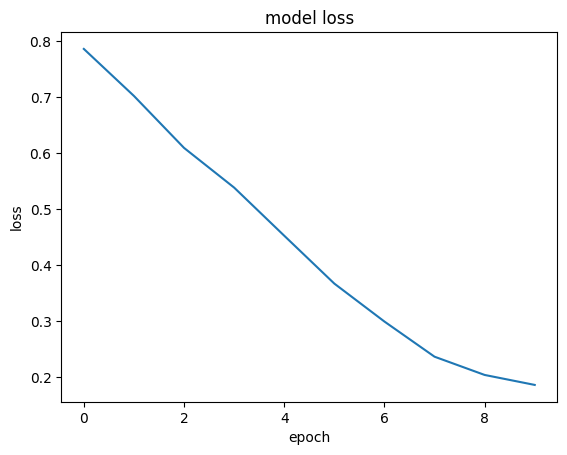

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.evaluate(X_valid,y_valid)

24/24 [==============================] - 1s 5ms/step - loss: 0.6263 - accuracy: 0.7651


[0.6262726783752441, 0.7650918364524841]

In [ ]:
actual = np.array(y_valid)
predicted = model.predict(X_valid)

24/24 [==============================] - 0s 4ms/step


In [ ]:
for index,i in enumerate(predicted):
    if i>=0.5:
        predicted[index]=1
    else:
        predicted[index]=0

In [ ]:
precision = precision_score(actual, predicted)
recall = recall_score(actual,predicted)
F1score = f1_score(actual,predicted)
print("Recall = ",recall)
print("Precision = ",precision)
print("F1 Score = ",F1score)

Recall =  0.717948717948718
Precision =  0.75
F1 Score =  0.7336244541484715


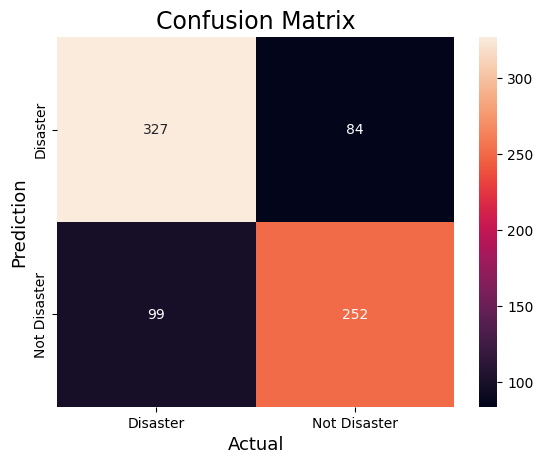

In [ ]:
cm = confusion_matrix(actual,predicted)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Disaster','Not Disaster'],
            yticklabels=['Disaster','Not Disaster'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()